REAL-TIMESENTIMENT ANALYSIS(FER-2013) DATA ANALYSIS

In [59]:
import pandas as pd
import numpy as np
df=pd.read_csv('fer2013.csv')
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [60]:
df.isna().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [61]:
df.drop('Usage',axis=1,inplace=True)

In [62]:
df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [63]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


ADDING EMOTION_MAPPING TO THE FER2013 DATA

In [64]:
emotion_mapping = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'
}
df['emotion_label'] = df['emotion'].map(emotion_mapping)
df

,emotion,pixels,emotion_label
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,anger
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,anger
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,sadness
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,neutral
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,happiness
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,anger
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,happiness


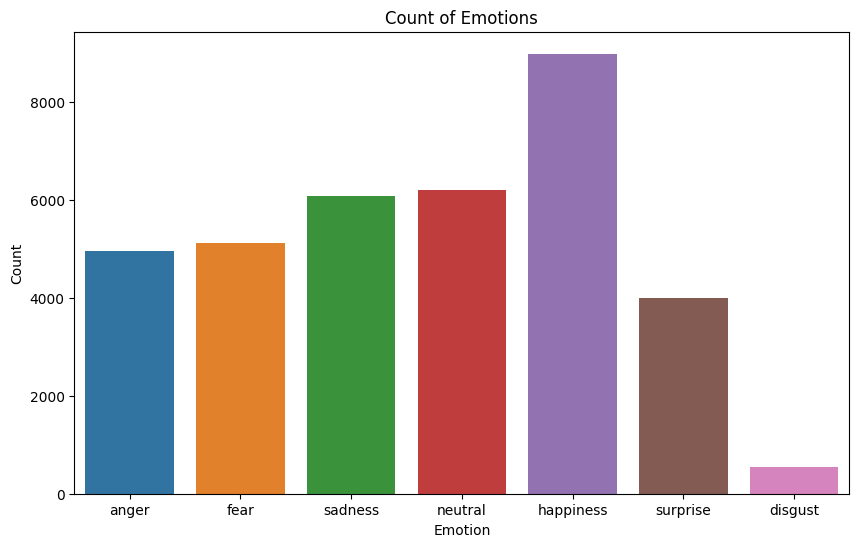

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion_label')
plt.title('Count of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

RESHAPING THE DATA,AND APPLYING MIN MAX SCALER

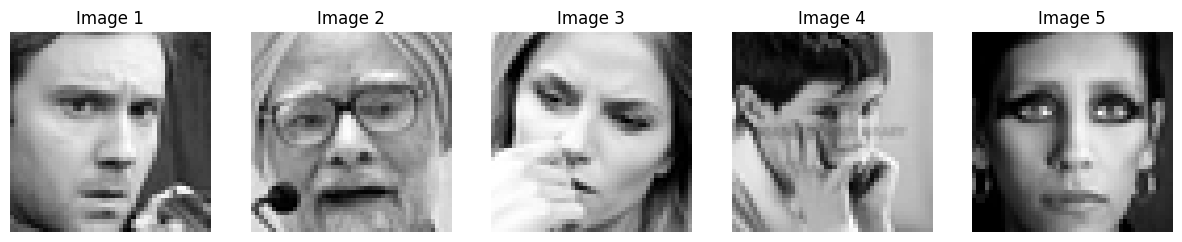

In [66]:
from sklearn.preprocessing import MinMaxScaler
pixels = df['pixels'].apply(lambda x: np.array(x.split(), dtype='int32'))
images = np.vstack(pixels).reshape(-1, 48, 48)
scaler = MinMaxScaler()
images_scaled = scaler.fit_transform(images.reshape(-1, 2304)).reshape(-1, 48, 48)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(images_scaled[i], cmap='gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['emotion_label'])


In [68]:
import numpy as np
x = np.array(images_scaled).astype('float32')
y = np.array(y).astype('float32')


In [69]:
y

array([0., 0., 2., ..., 0., 3., 2.], dtype=float32)

In [70]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((28709, 48, 48), (28709,), (7178, 48, 48), (7178,))

In [71]:
X_train

array([[[0.01568628, 0.01568628, 0.01568628, ..., 0.11372549,
         0.1254902 , 0.12156863],
        [0.03921569, 0.03529412, 0.02352941, ..., 0.4862745 ,
         0.5294118 , 0.5294118 ],
        [0.03529412, 0.03529412, 0.02745098, ..., 0.46666667,
         0.5019608 , 0.5137255 ],
        ...,
        [0.45882353, 0.46666667, 0.49803922, ..., 0.02745098,
         0.01568628, 0.01568628],
        [0.05882353, 0.04705882, 0.08235294, ..., 0.01176471,
         0.00784314, 0.01176471],
        [0.00392157, 0.00392157, 0.        , ..., 0.01176471,
         0.01176471, 0.01176471]],

       [[0.11764706, 0.1254902 , 0.16078432, ..., 0.7137255 ,
         0.63529414, 0.6117647 ],
        [0.09411765, 0.14509805, 0.12156863, ..., 0.70980394,
         0.627451  , 0.5921569 ],
        [0.11372549, 0.12156863, 0.08235294, ..., 0.73333335,
         0.627451  , 0.58431375],
        ...,
        [0.6745098 , 0.68235296, 0.4745098 , ..., 0.49411765,
         0.43529412, 0.4627451 ],
        [0.6

OUTLIER DETECTION USING QUANTILE AND Z-SCORE

In [72]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [73]:
df[df.emotion>df.emotion.quantile(0.5990)]

,emotion,pixels,emotion_label
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,neutral
11,6,39 75 78 58 58 45 49 48 103 156 81 45 41 38 49...,neutral
12,6,219 213 206 202 209 217 216 215 219 218 223 23...,neutral
13,6,148 144 130 129 119 122 129 131 139 153 140 12...,neutral
15,5,107 107 109 109 109 109 110 101 123 140 144 14...,surprise
...,...,...,...
35874,5,43 43 51 73 94 97 102 95 99 107 126 144 154 17...,surprise
35875,5,248 251 239 144 102 95 82 77 91 138 153 145 14...,surprise
35876,6,29 29 27 31 49 56 29 19 22 20 34 43 55 71 85 9...,neutral
35877,6,139 143 145 154 159 168 176 181 190 191 195 19...,neutral


In [74]:
df[df.emotion<df.emotion.quantile(0.2)]

,emotion,pixels,emotion_label
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,anger
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,anger
10,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,anger
22,0,123 125 124 142 209 226 234 236 231 232 235 22...,anger
23,0,8 9 14 21 26 32 37 46 52 62 72 70 71 73 76 83 ...,anger
...,...,...,...
35845,0,149 141 141 137 143 157 166 123 217 230 220 21...,anger
35849,0,90 82 42 36 33 45 81 112 122 139 155 149 152 1...,anger
35854,0,139 141 141 138 152 164 176 160 137 118 106 95...,anger
35881,0,181 177 176 156 178 144 136 132 122 107 131 16...,anger


In [75]:
upper_limit=df.emotion.mean()+3*df.emotion.std()
upper_limit

8.944720969849602

In [76]:
lower_limit=df.emotion.mean()-3*df.emotion.std()
lower_limit

-2.298191585950139

In [77]:
df=df[(df.emotion<upper_limit) & (df.emotion>lower_limit)]

In [78]:
print(df.describe())

            emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000


In [79]:
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn .model_selection import RandomizedSearchCV


In [80]:
print(X_train.shape)


(28709, 48, 48)


In [44]:
svc = SVC()

# Parameter grid
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.001, 0.01]
}

# Set up RandomizedSearchCV
random_search_svc = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_grid_svc,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1  # Use a single worker
)
# Use only a portion of the training data
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]
X_train_small1=X_train_small.reshape(X_train_small.shape[0], -1)  # Reshape to (28709, 2304)

random_search_svc.fit(X_train_small1, y_train_small)

# Best parameters and accuracy
print("Best Parameters for SVC:", random_search_svc.best_params_)
print("Best Score:", random_search_svc.best_score_)

c:\Users\91739\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.5s
[CV] END ..................C=0.1, gamma=0.001, k

In [45]:
gbc = GradientBoostingClassifier()

# Parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}

# Set up RandomizedSearchCV
random_search_gbc = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid_gbc,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1  # Use a single worker
)

# Use only a portion of the training data
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]
X_train_small1 = X_train_small.reshape(X_train_small.shape[0], -1)  # Reshape to (1000, 2304)

# Fit the RandomizedSearchCV with the data
random_search_gbc.fit(X_train_small1, y_train_small)

# Best parameters and accuracy
print("Best Parameters for GradientBoosting:", random_search_gbc.best_params_)
print("Best Score for GradientBoosting:", random_search_gbc.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=100, subsample=0.8; total time=13.1min
[CV] END learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=100, subsample=0.8; total time=12.2min
[CV] END learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=100, subsample=0.8; total time=13.2min
[CV] END learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=100, subsample=0.8; total time=12.5min


KeyboardInterrupt: 

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model architecture
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for the emotions
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

# Data reshaping and normalization
X_train = X_train[..., np.newaxis]  # Add channel dimension
X_test = X_test[..., np.newaxis]

# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=64,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_20 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_21 (Bat  (None, 21, 21, 64)      

VISUALIZATION

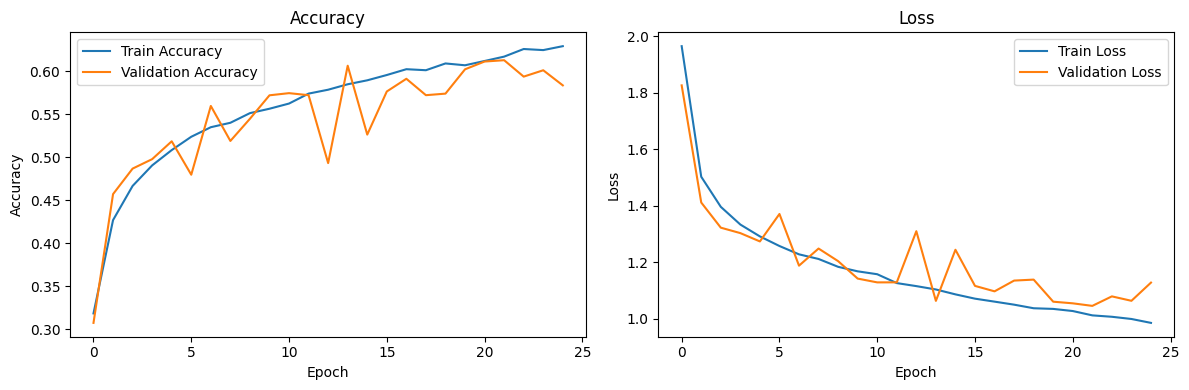

In [82]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


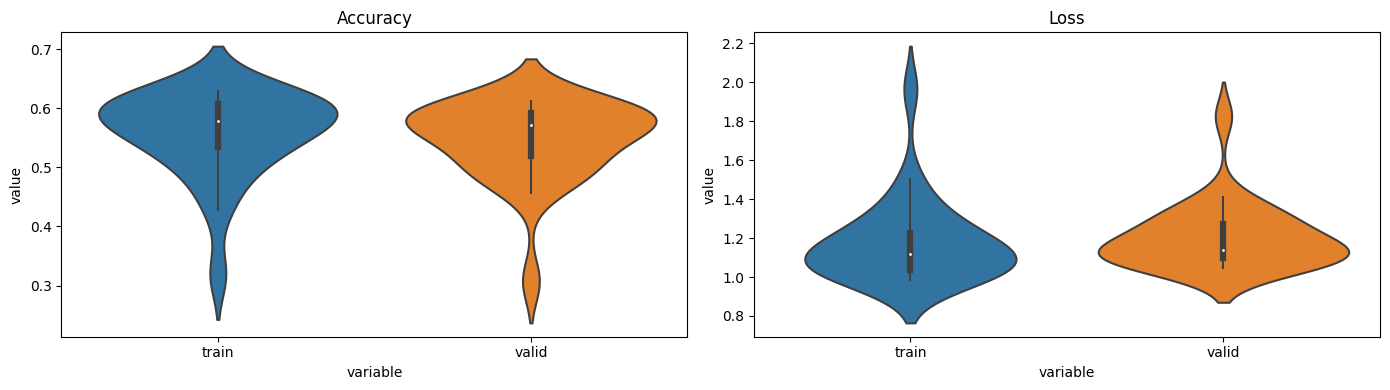

In [83]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = plt.figure(0, (14, 4))
ax = plt.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
plt.title('Loss')
plt.tight_layout()

plt.savefig('performance_dist.png')
plt.show()

In [84]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


In [85]:
print(f"y_test shape: {y_test.shape}")


y_test shape: (7178,)


225/225 [==============================] - 3s 14ms/step


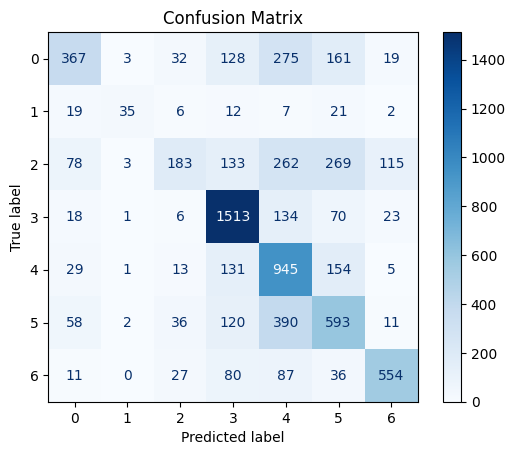

Total wrong validation predictions: 2988

Classification Report:

              precision    recall  f1-score   support

         0.0       0.63      0.37      0.47       985
         1.0       0.78      0.34      0.48       102
         2.0       0.60      0.18      0.27      1043
         3.0       0.71      0.86      0.78      1765
         4.0       0.45      0.74      0.56      1278
         5.0       0.45      0.49      0.47      1210
         6.0       0.76      0.70      0.73       795

    accuracy                           0.58      7178
   macro avg       0.63      0.52      0.54      7178
weighted avg       0.60      0.58      0.56      7178



In [86]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predict labels for the test set
yhat_valid = np.argmax(model.predict(X_test), axis=1)  # Ensure predictions are label-encoded

# Compute confusion matrix
cm = confusion_matrix(y_test, yhat_valid)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Count misclassifications
total_wrong = np.sum(y_test != yhat_valid)
print(f"Total wrong validation predictions: {total_wrong}\n")

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, yhat_valid))


In [87]:
# Save the trained model
model.save("sentiment_analysis_model.h5")
print("Model saved successfully.")


Model saved successfully.


In [1]:
from tensorflow.keras.models import load_model

# Load the saved model
deployed_model = load_model("sentiment_analysis_model.h5")
print("Model loaded for deployment.")


Model loaded for deployment.


 0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'

In [4]:
import numpy as np

# Example function for prediction
def predict_emotion(image_path, model):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    return class_index, predictions

# Predict emotion for a sample image
class_index, predictions = predict_emotion("revanth.jpeg", deployed_model)
print(f"Predicted class index: {class_index}")
print(f"Class probabilities: {predictions}")


1/1 [==============================] - 0s 43ms/step
Predicted class index: 0
Class probabilities: [[0.32892627 0.01121664 0.21184175 0.03723343 0.13404763 0.16352546
  0.11320887]]
